In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
from branca.colormap import linear

In [46]:
df = pd.read_csv('markets_cleaned.csv')

print("Tampilan awal data:")
display(df.head())





Tampilan awal data:


,Unnamed: 0,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine,num_items_sold,state_pop
0,0,Island Market,Key Largo,Monroe,Florida,-80.427,25.109,6,1,1,...,1,1,1,0,0,1,0,0,18,19893297.000
1,1,COFFO Harvest Farmers' Market,Florida City,Miami-Dade,Florida,-80.482,25.450,12,0,0,...,1,0,0,0,1,1,0,0,7,19893297.000
2,2,COFFO Harvest Farmers' Market,Homestead,Miami-Dade,Florida,-80.483,25.463,12,0,0,...,1,0,0,0,1,1,0,0,7,19893297.000
3,3,Verde Gardens Farmers Market,Homestead,Miami-Dade,Florida,-80.396,25.507,12,0,0,...,1,0,0,0,0,1,0,0,5,19893297.000
4,4,Verde Community Farm and Market,Homestead,Miami-Dade,Florida,-80.396,25.507,9,0,0,...,0,0,0,0,0,1,0,0,5,19893297.000


In [47]:
print("\nInformasi data:")
df.info()



Informasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5343 entries, 0 to 5342
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5343 non-null   int64  
 1   name            5343 non-null   object 
 2   city            5340 non-null   object 
 3   county          5341 non-null   object 
 4   state           5343 non-null   object 
 5   lat             5339 non-null   float64
 6   lon             5339 non-null   float64
 7   months_open     5343 non-null   int64  
 8   Bakedgoods      5343 non-null   int64  
 9   Beans           5343 non-null   int64  
 10  Cheese          5343 non-null   int64  
 11  Coffee          5343 non-null   int64  
 12  Crafts          5343 non-null   int64  
 13  Eggs            5343 non-null   int64  
 14  Flowers         5343 non-null   int64  
 15  Fruits          5343 non-null   int64  
 16  Grains          5343 non-null   int64  
 17  Herbs           

In [48]:

print("\nStatistik deskriptif:")
display(df.describe())


Statistik deskriptif:


,Unnamed: 0,lat,lon,months_open,Bakedgoods,Beans,Cheese,Coffee,Crafts,Eggs,...,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine,num_items_sold,state_pop
count,5343.000,5339.000,5339.000,5343.000,5343.000,5343.000,5343.000,5343.000,5343.000,5343.000,...,5343.000,5343.000,5343.000,5343.000,5343.000,5343.000,5343.000,5343.000,5343.000,5343.000
mean,2671.000,-89.889,39.454,6.377,0.885,0.145,0.493,0.361,0.627,0.757,...,0.620,0.248,0.690,0.040,0.279,0.957,0.148,0.179,13.544,11071888.841
std,1542.536,15.750,4.484,2.675,0.318,0.352,0.500,0.480,0.484,0.429,...,0.485,0.432,0.462,0.197,0.449,0.203,0.355,0.383,5.791,10239757.559
min,0.000,-124.416,25.109,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,584153.000
25%,1335.500,-96.151,36.857,5.000,1.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,10.000,4741079.000
50%,2671.000,-85.702,40.057,6.000,1.000,0.000,0.000,0.000,1.000,1.000,...,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,14.000,6745408.000
75%,4006.500,-77.227,42.518,7.000,1.000,0.000,1.000,1.000,1.000,1.000,...,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,18.000,12880580.000
max,5342.000,-67.277,48.943,12.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,28.000,38802500.000


In [49]:
print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())


Jumlah nilai yang hilang per kolom:
Unnamed: 0        0
name              0
city              3
county            2
state             0
lat               4
lon               4
months_open       0
Bakedgoods        0
Beans             0
Cheese            0
Coffee            0
Crafts            0
Eggs              0
Flowers           0
Fruits            0
Grains            0
Herbs             0
Honey             0
Jams              0
Juices            0
Maple             0
Meat              0
Mushrooms         0
Nursery           0
Nuts              0
PetFood           0
Plants            0
Poultry           0
Prepared          0
Seafood           0
Soap              0
Tofu              0
Trees             0
Vegetables        0
WildHarvested     0
Wine              0
num_items_sold    0
state_pop         0
dtype: int64


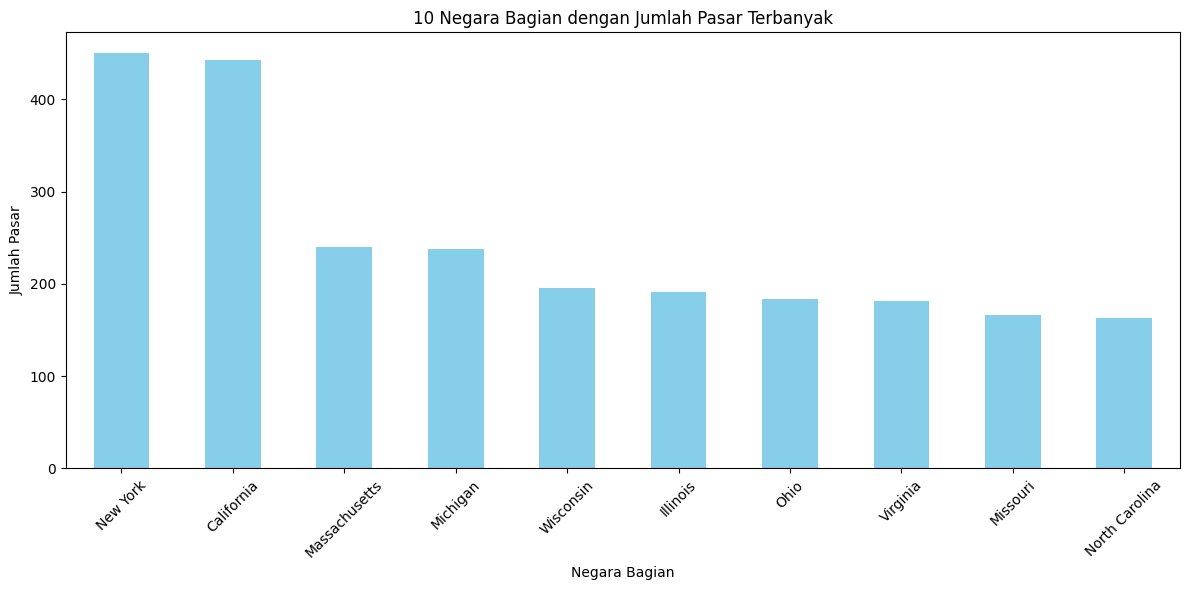

In [50]:
# Hitung jumlah pasar per negara bagian
markets_by_state = df['state'].value_counts()

# 10 negara bagian teratas
plt.figure(figsize=(12, 6))
markets_by_state.head(10).plot(kind='bar', color='skyblue')
plt.title('10 Negara Bagian dengan Jumlah Pasar Terbanyak')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pasar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


New York dan California menempati posisi teratas dengan jumlah pasar petani terbanyak di seluruh Amerika Serikat, masing-masing lebih dari 450 pasar.

Jarak antara New York dan California sangat kecil, menandakan kedua negara bagian ini sangat aktif dalam mengadakan pasar petani.

Massachusetts dan Michigan berada di posisi ke-3 dan ke-4 dengan jumlah pasar sekitar 240-an, menunjukkan bahwa wilayah timur laut dan tengah juga memiliki aktivitas pasar petani yang signifikan.

Negara bagian seperti Wisconsin, Illinois, Ohio, Virginia, Missouri, dan North Carolina masing-masing memiliki sekitar 170–200 pasar, menunjukkan ketersebaran pasar yang relatif merata di wilayah tengah dan timur AS.

Tren umum menunjukkan bahwa wilayah dengan populasi besar dan/atau kesadaran tinggi terhadap produk lokal cenderung memiliki lebih banyak pasar petani.

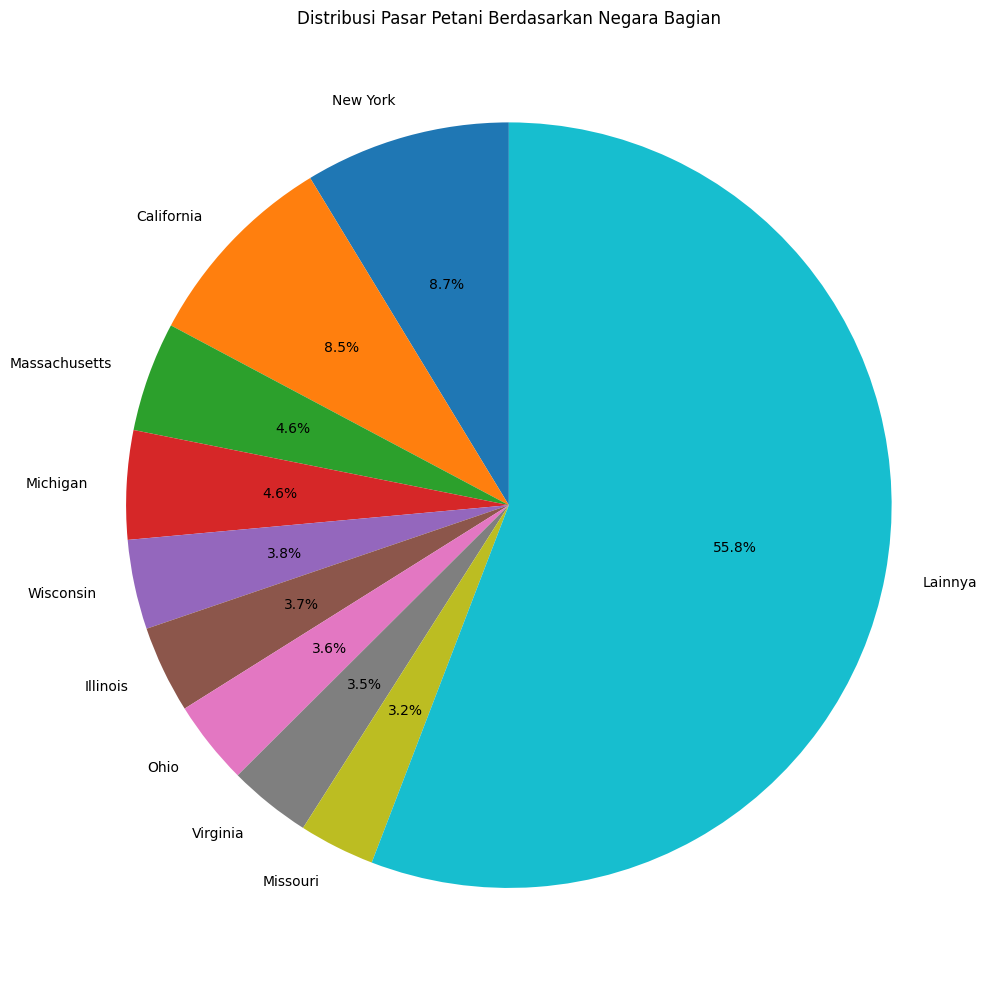

In [51]:
# Pie chart distribusi pasar
plt.figure(figsize=(10, 10))
# Gabungkan negara bagian dengan jumlah pasar sedikit ke dalam kategori 'Lainnya'
others = markets_by_state[markets_by_state < markets_by_state.iloc[9]].sum()
top_states = markets_by_state.head(9).copy()
top_states['Lainnya'] = others

plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribusi Pasar Petani Berdasarkan Negara Bagian')
plt.tight_layout()
plt.show()


New York (8.7%) dan California (8.5%) menyumbang proporsi terbesar pasar petani di Amerika Serikat, masing-masing hampir 9% dari total pasar.

Posisi berikutnya ditempati oleh:

Massachusetts & Michigan: masing-masing sekitar 4.6%

Wisconsin, Illinois, Ohio, Virginia, Missouri: berkisar antara 3.2% hingga 3.8%

Gabungan 10 negara bagian teratas hanya mencakup ~44.2% dari seluruh pasar petani di AS.

Sebagian besar pasar (55.8%) tersebar di negara bagian lainnya, menunjukkan bahwa pasar petani tidak terkonsentrasi hanya di beberapa negara bagian saja.

Hal ini menunjukkan distribusi yang cukup merata secara nasional, meskipun terdapat beberapa negara bagian dengan kontribusi lebih dominan.

In [53]:
# Bersihkan kolom county
df['county'] = df['county'].str.strip().str.title()

# Kembalikan nama kolom lat/lon sesuai aslinya (lat = latitude, lon = longitude)
df.rename(columns={'lon': 'lon', 'lat': 'lat'}, inplace=True)

# Hitung jumlah pasar per county
market_count_by_county = df['county'].value_counts().reset_index()
market_count_by_county.columns = ['county', 'market_count']

# Ambil rata-rata koordinat untuk tiap county
county_coords = df.groupby('county')[['lat', 'lon']].mean().reset_index()

# Gabungkan data jumlah pasar dan koordinat
county_map_data = pd.merge(market_count_by_county, county_coords, on='county', how='inner')

# Buat peta dasar dengan gaya visual yang clean
heatmap_map = folium.Map(location=[37.8, -96],  # Titik tengah AS
                         zoom_start=5,
                         tiles='CartoDB positron')

# Tambahkan cluster untuk mengelompokkan marker (opsional)
marker_cluster = MarkerCluster().add_to(heatmap_map)

# Normalisasi untuk warna berdasarkan jumlah pasar
max_market = county_map_data['market_count'].max()

# Tambahkan marker
for _, row in county_map_data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + (row['market_count'] / max_market) * 10,  # skala radius
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5 + (row['market_count'] / max_market) * 0.5,  # lebih terang jika lebih banyak
        popup=folium.Popup(f"<b>{row['county']}</b><br>Pasar: {row['market_count']}", max_width=250),
        tooltip=f"{row['county']}: {row['market_count']} pasar"
    ).add_to(marker_cluster)

# Tampilkan peta
heatmap_map

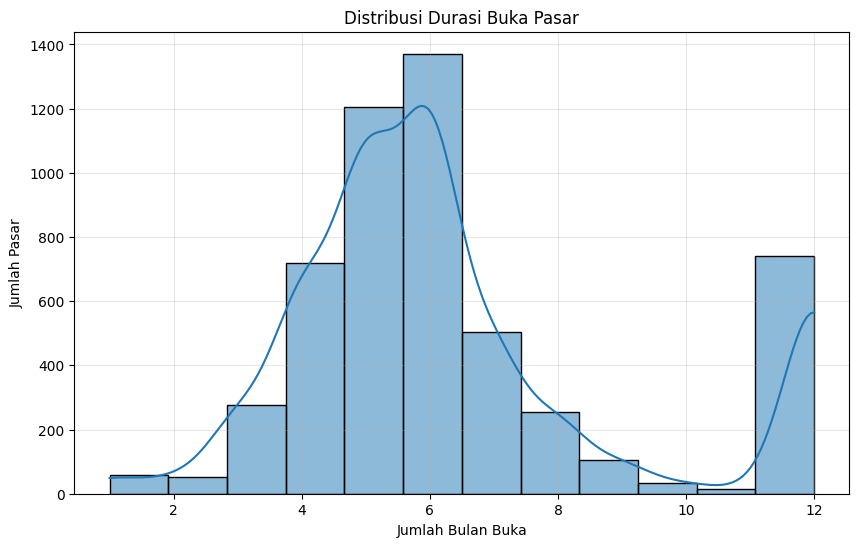

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['months_open'], bins=12, kde=True)
plt.title('Distribusi Durasi Buka Pasar')
plt.xlabel('Jumlah Bulan Buka')
plt.ylabel('Jumlah Pasar')
plt.grid(True, alpha=0.3)
plt.show()


Durasi buka pasar paling umum adalah sekitar 5–6 bulan. Ini terlihat dari puncak distribusi (mode) yang berada pada kisaran tersebut, dengan jumlah pasar terbanyak.

Setelah 6 bulan, jumlah pasar menurun secara signifikan, menandakan bahwa sebagian besar pasar petani tidak buka sepanjang tahun.

Namun, ada lonjakan signifikan pada angka 12 bulan, menunjukkan bahwa sebagian pasar juga beroperasi secara tahunan (permanen) meskipun jumlahnya lebih sedikit dibanding yang musiman.

Distribusi berbentuk right-skewed (miring ke kanan), mengindikasikan lebih banyak pasar yang buka dalam jangka waktu pendek hingga menengah dibanding jangka panjang.

Ada sedikit sekali pasar yang hanya buka 1–2 bulan, menandakan bahwa pasar petani biasanya memiliki durasi operasional yang cukup stabil dan bukan sangat temporer.

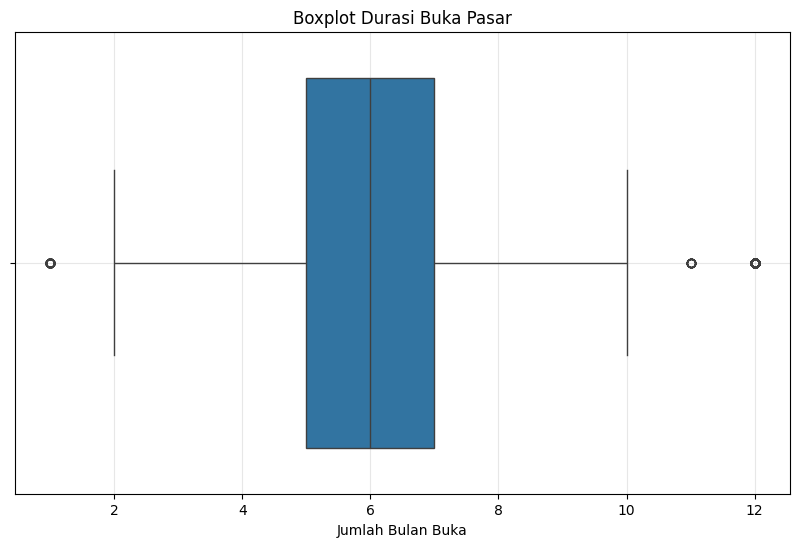

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['months_open'])
plt.title('Boxplot Durasi Buka Pasar')
plt.xlabel('Jumlah Bulan Buka')
plt.grid(True, alpha=0.3)
plt.show()

Median durasi buka pasar adalah sekitar 6 bulan, yang juga terlihat dari distribusi histogram sebelumnya.

Sebagian besar pasar buka antara 4 hingga 8 bulan, ditunjukkan oleh panjang kotak (interquartile range/IQR), yang mewakili 50% pasar di tengah distribusi.

Nilai minimum dan maksimum (tanpa outlier) berkisar dari 2 hingga 10 bulan.

Terlihat adanya outlier di kedua sisi:

Outlier rendah di sekitar 1 bulan → pasar yang hanya buka sangat singkat.

Outlier tinggi di 11–12 bulan → pasar tahunan yang buka sepanjang tahun.

Distribusi agak simetris dengan sedikit kecenderungan ke arah durasi yang lebih lama (karena outlier tinggi di 12 bulan).

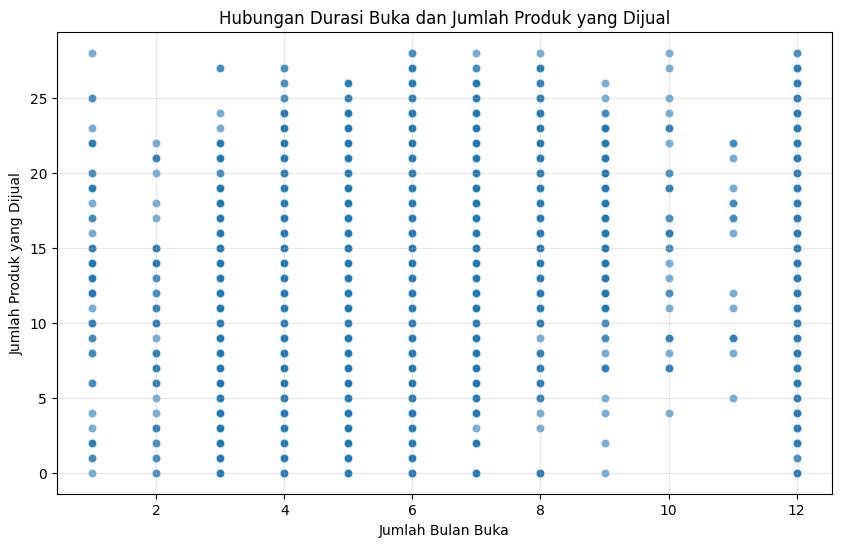

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='months_open', y='num_items_sold', data=df, alpha=0.6)
plt.title('Hubungan Durasi Buka dan Jumlah Produk yang Dijual')
plt.xlabel('Jumlah Bulan Buka')
plt.ylabel('Jumlah Produk yang Dijual')
plt.grid(True, alpha=0.3)
plt.show()

Tidak terdapat hubungan linier yang jelas antara durasi buka pasar (jumlah bulan) dengan jumlah produk yang dijual.

Pasar yang buka hanya 1–3 bulan tetap bisa menjual hingga 20–28 produk.

Sebaliknya, pasar yang buka 12 bulan penuh juga memiliki keragaman jumlah produk yang besar, dari sangat sedikit hingga 28 produk.

Sebaran vertikal pada setiap bulan sangat lebar, menandakan bahwa jumlah produk lebih ditentukan oleh faktor lain, bukan hanya lamanya pasar dibuka.

Distribusi relatif merata, tidak terlihat kecenderungan bahwa semakin lama pasar buka, semakin banyak produk yang dijual.

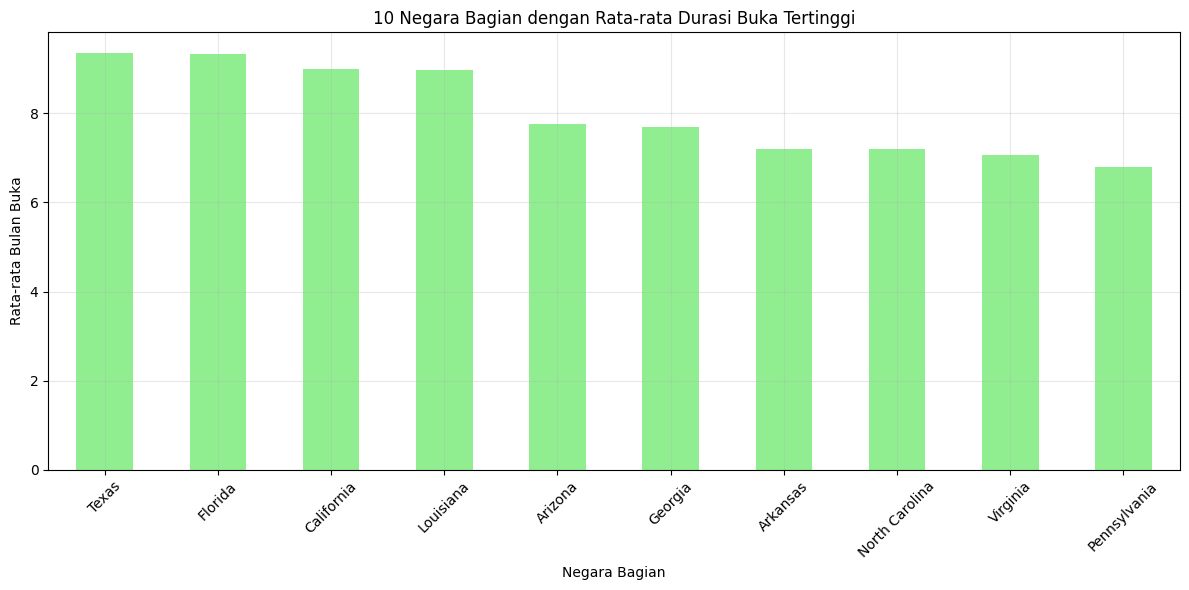

In [57]:
# Top 5 states dengan rata-rata durasi buka tertinggi
avg_months_by_state = df.groupby('state')['months_open'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_months_by_state.head(10).plot(kind='bar', color='lightgreen')
plt.title('10 Negara Bagian dengan Rata-rata Durasi Buka Tertinggi')
plt.xlabel('Negara Bagian')
plt.ylabel('Rata-rata Bulan Buka')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Texas dan Florida memiliki rata-rata durasi buka pasar tertinggi, mendekati 9,5 bulan per tahun, menunjukkan bahwa pasar di kedua negara bagian ini beroperasi hampir sepanjang tahun.

California dan Louisiana juga memiliki rata-rata di atas 9 bulan, mencerminkan iklim yang mendukung dan mungkin tingkat aktivitas ekonomi yang tinggi dalam sektor pertanian lokal.

Negara bagian lain seperti Arizona, Georgia, Arkansas, North Carolina, Virginia, dan Pennsylvania memiliki rata-rata durasi buka antara sekitar 6,8–7,8 bulan, yang masih tergolong tinggi namun tidak sepanjang negara bagian teratas.

Ke-10 negara bagian ini kemungkinan berada di wilayah dengan iklim hangat, musim tanam panjang, dan permintaan lokal yang tinggi terhadap produk segar dari pasar petani.

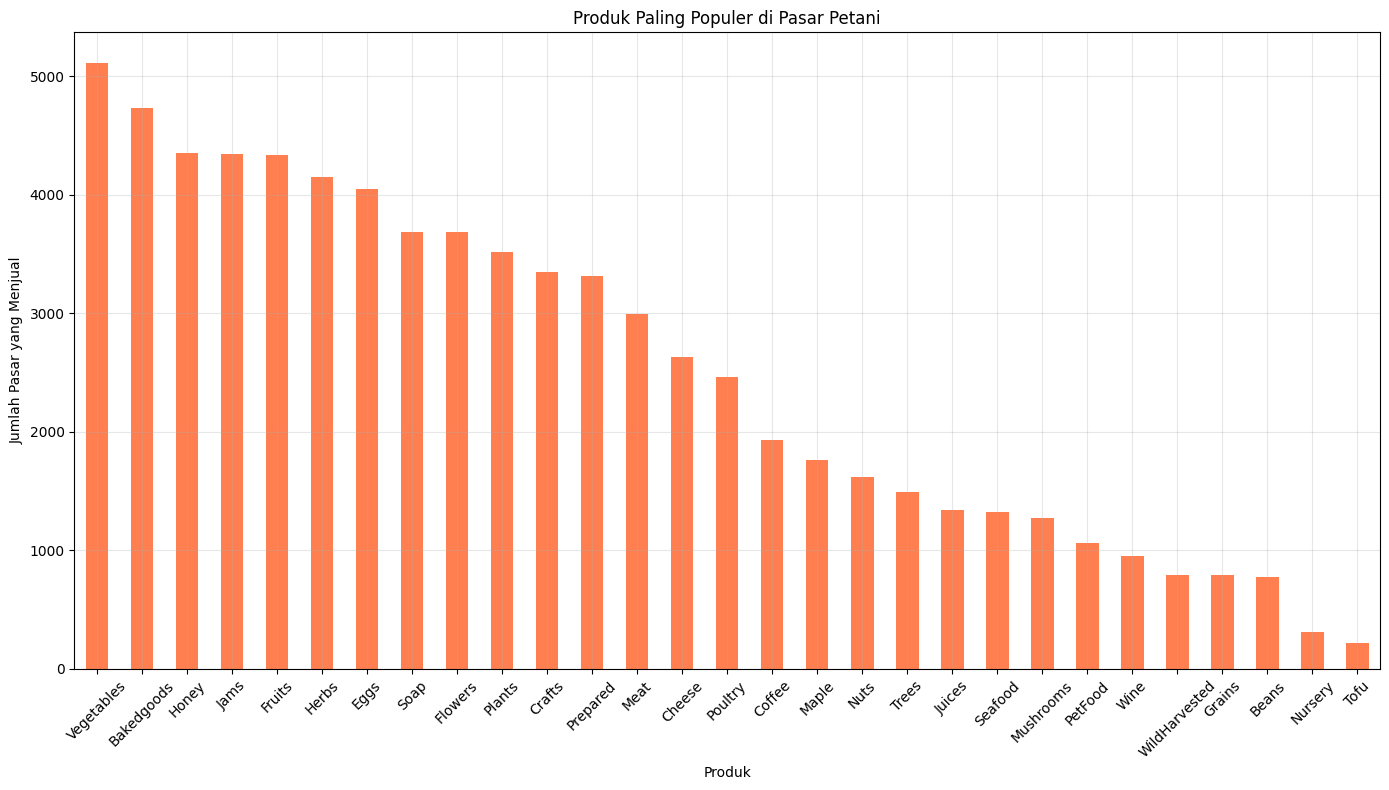

In [58]:
# Daftar kolom produk
product_columns = ['Bakedgoods', 'Beans', 'Cheese', 'Coffee', 'Crafts', 'Eggs', 
                  'Flowers', 'Fruits', 'Grains', 'Herbs', 'Honey', 'Jams', 
                  'Juices', 'Maple', 'Meat', 'Mushrooms', 'Nursery', 'Nuts', 
                  'PetFood', 'Plants', 'Poultry', 'Prepared', 'Seafood', 'Soap', 
                  'Tofu', 'Trees', 'Vegetables', 'WildHarvested', 'Wine']

# Hitung jumlah pasar yang menjual tiap produk
product_counts = df[product_columns].sum().sort_values(ascending=False)

# Bar chart produk terpopuler
plt.figure(figsize=(14, 8))
product_counts.plot(kind='bar', color='coral')
plt.title('Produk Paling Populer di Pasar Petani')
plt.xlabel('Produk')
plt.ylabel('Jumlah Pasar yang Menjual')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Vegetables (sayuran) merupakan produk paling populer, dijual di lebih dari 5.000 pasar petani, menunjukkan permintaan yang sangat tinggi terhadap sayuran segar dari konsumen lokal.

Produk lain yang juga sangat umum dijual antara lain:

Baked goods (roti dan kue)

Honey (madu)

Jams (selai)

Fruits (buah-buahan)

Herbs (herbal/rempah)
Ini menunjukkan bahwa pasar petani tidak hanya menawarkan hasil tani, tapi juga produk olahan rumahan dan kesehatan.

Produk seperti Soap, Flowers, Plants, Crafts, dan Prepared food juga cukup populer, menunjukkan bahwa pasar petani juga menjadi wadah bagi pengrajin lokal dan penjual makanan siap saji.

Produk yang kurang umum dijual adalah Nursery tanaman, Tofu, Beans, Grains, dan Wine, yang masing-masing ditawarkan oleh kurang dari 1.000 pasar. Hal ini bisa terjadi karena:

Tidak semua pasar memiliki akses ke produk ini.

Produk tersebut memerlukan proses produksi atau izin khusus.

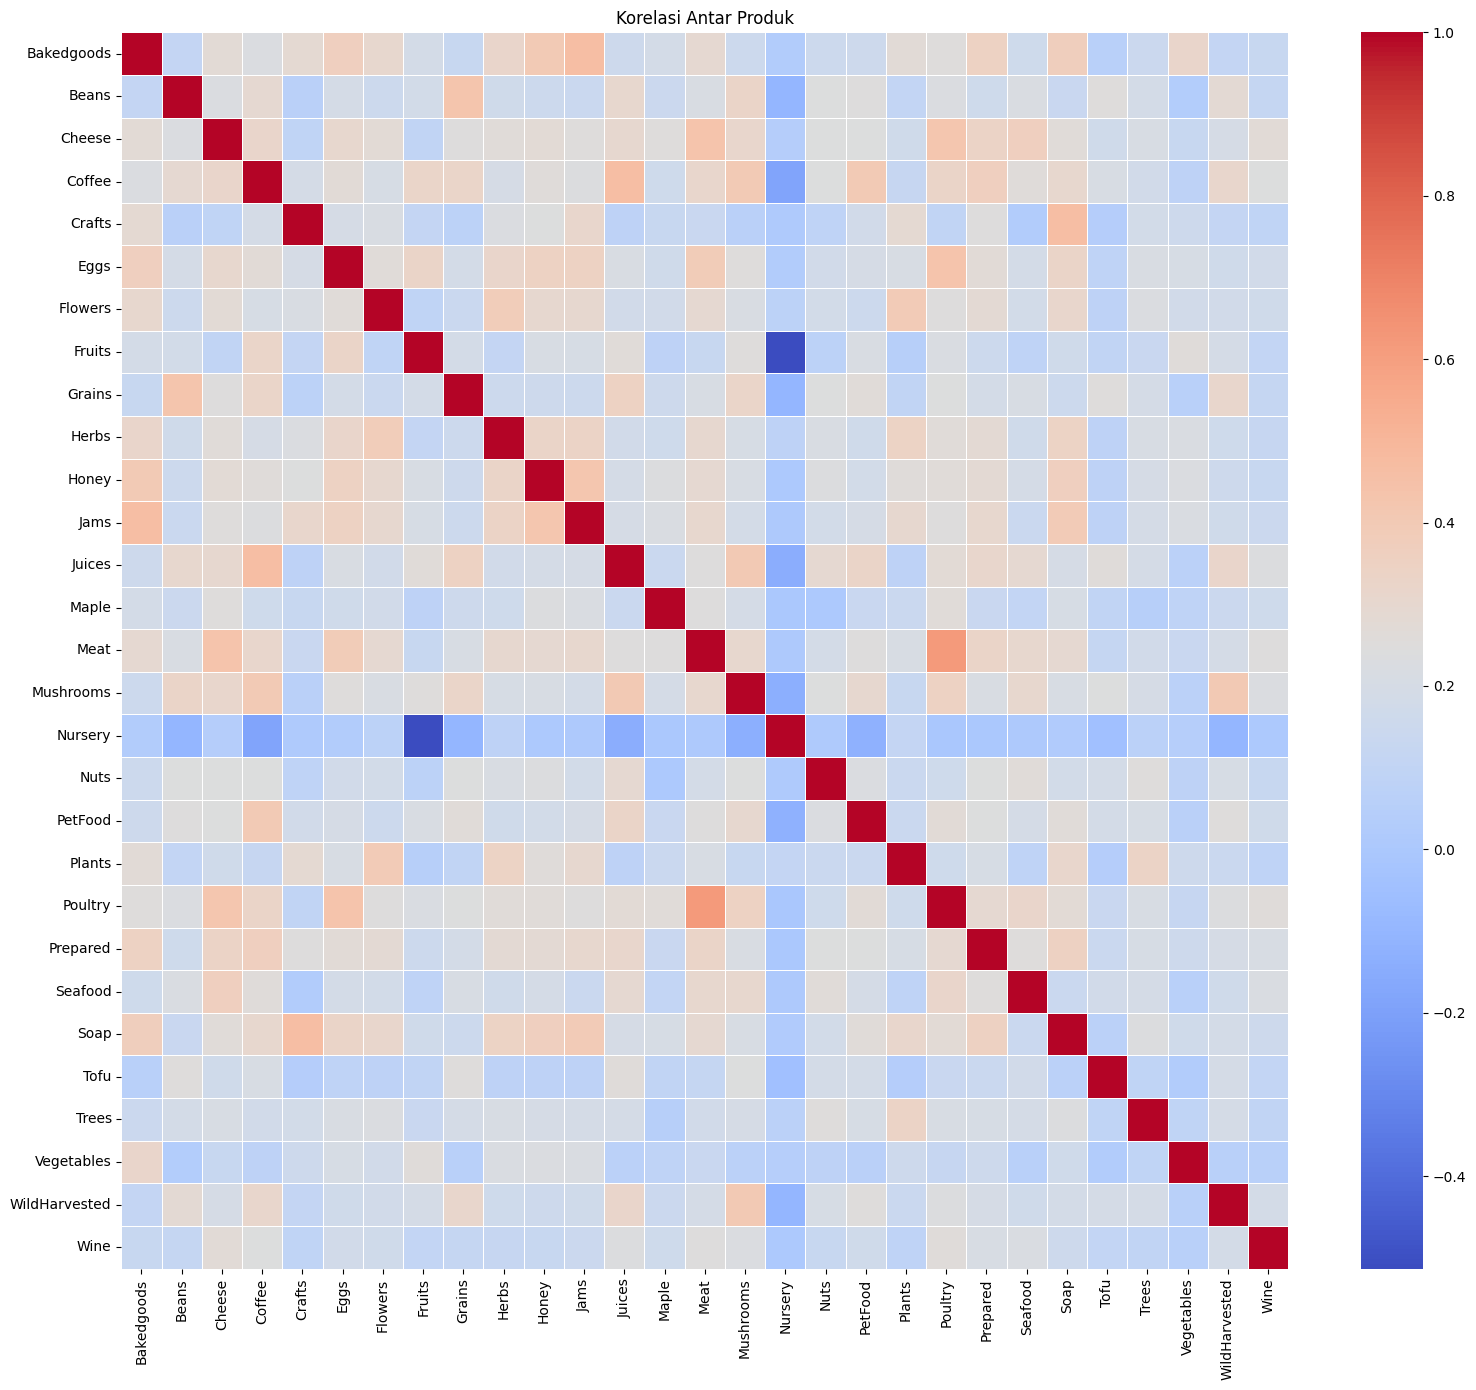

In [59]:
plt.figure(figsize=(16, 14))
sns.heatmap(df[product_columns].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Produk')
plt.tight_layout()
plt.show()


Produk yang Sering Dijual Bersamaan (Korelasi Positif Tinggi):

Fruits & Juices

Vegetables & Herbs

Prepared & Bakedgoods

Honey & Jams

💡 Strategi: Produk-produk ini cocok untuk paket bundling atau penempatan bersama di toko.

Produk yang Jarang Muncul Bersamaan (Korelasi Negatif):

Nursery cenderung tidak dijual bersama produk seperti Flowers, Meat, dan Eggs.

Mushrooms punya korelasi negatif dengan Cheese dan Eggs.

💡 Strategi: Produk ini lebih baik dipisah secara kategori atau lokasi penjualan.

Produk yang Berdiri Sendiri (Minim Korelasi dengan Produk Lain):

Nursery, Seafood, dan PetFood tidak punya hubungan kuat dengan kebanyakan produk lain.

💡 Strategi: Fokus pada target pasar khusus atau promosi tersendiri.

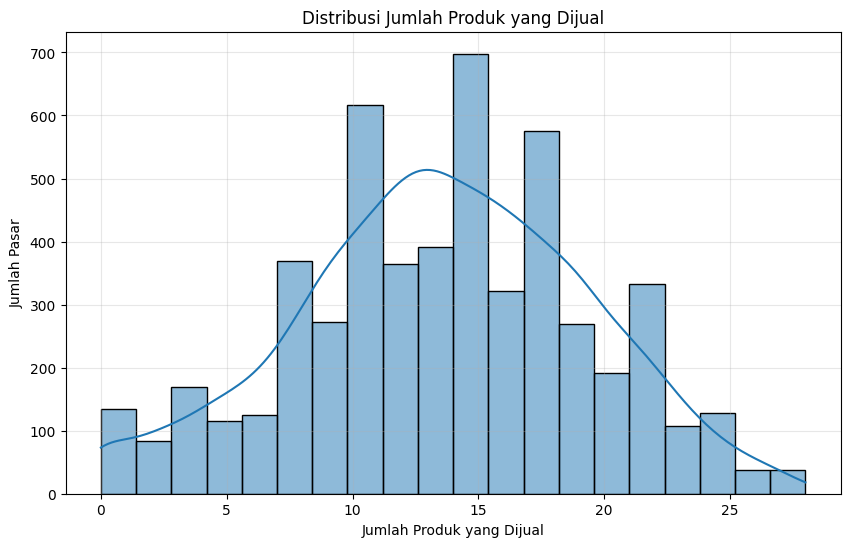

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df['num_items_sold'], bins=20, kde=True)
plt.title('Distribusi Jumlah Produk yang Dijual')
plt.xlabel('Jumlah Produk yang Dijual')
plt.ylabel('Jumlah Pasar')
plt.grid(True, alpha=0.3)
plt.show()


Distribusi berbentuk lonceng (mendekati normal):

Mayoritas pasar menjual antara 10 hingga 18 produk.

Ini menunjukkan bahwa sebagian besar pasar menjual dalam jumlah produk yang sedang, tidak terlalu sedikit dan tidak terlalu banyak.

Puncak distribusi (modus):

Puncaknya berada di sekitar 14–15 produk, artinya jumlah ini paling sering dijual oleh pasar.

Sebagian kecil pasar menjual sangat sedikit atau sangat banyak produk:

Ada pasar yang hanya menjual 0–5 produk (ekstrem kiri) dan yang menjual lebih dari 22 produk (ekstrem kanan), tapi jumlahnya sedikit.

Distribusi sedikit miring ke kanan:

Artinya ada lebih banyak pasar yang menjual banyak produk daripada yang menjual sangat sedikit, meskipun tetap dalam jumlah kecil.



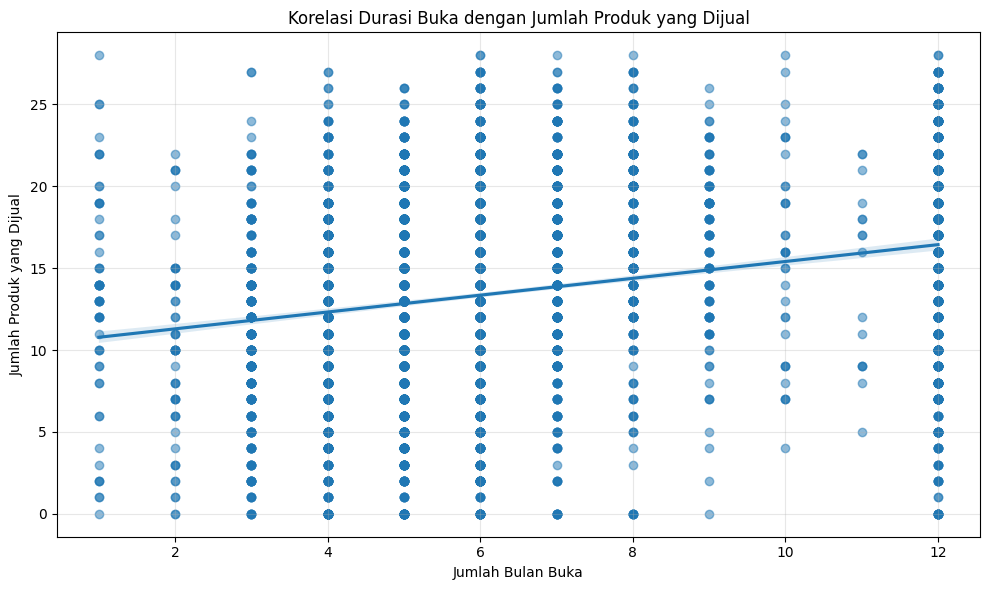

In [63]:
# Hitung jumlah jenis produk yang dijual per pasar
df['product_variety'] = df[product_columns].sum(axis=1)

# Korelasi num_items_sold dengan months_open
plt.figure(figsize=(10, 6))
sns.regplot(x='months_open', y='num_items_sold', data=df, scatter_kws={'alpha':0.5})
plt.title('Korelasi Durasi Buka dengan Jumlah Produk yang Dijual')
plt.xlabel('Jumlah Bulan Buka')
plt.ylabel('Jumlah Produk yang Dijual')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Terdapat korelasi positif lemah:

Semakin lama pasar buka dalam setahun (mendekati 12 bulan), cenderung menjual lebih banyak produk.

Ini ditunjukkan oleh kemiringan positif dari garis tren.

Sebaran data sangat bervariasi (dispersi tinggi):

Pasar yang buka 12 bulan bisa menjual sangat sedikit hingga sangat banyak produk.

Artinya, durasi buka bukan satu-satunya faktor yang menentukan banyaknya produk yang dijual.

Pasar yang hanya buka sebentar masih bisa menjual banyak produk:

Beberapa titik di sebelah kiri (misalnya yang hanya buka 1–4 bulan) menunjukkan jumlah produk yang tinggi, menandakan fleksibilitas model bisnis.

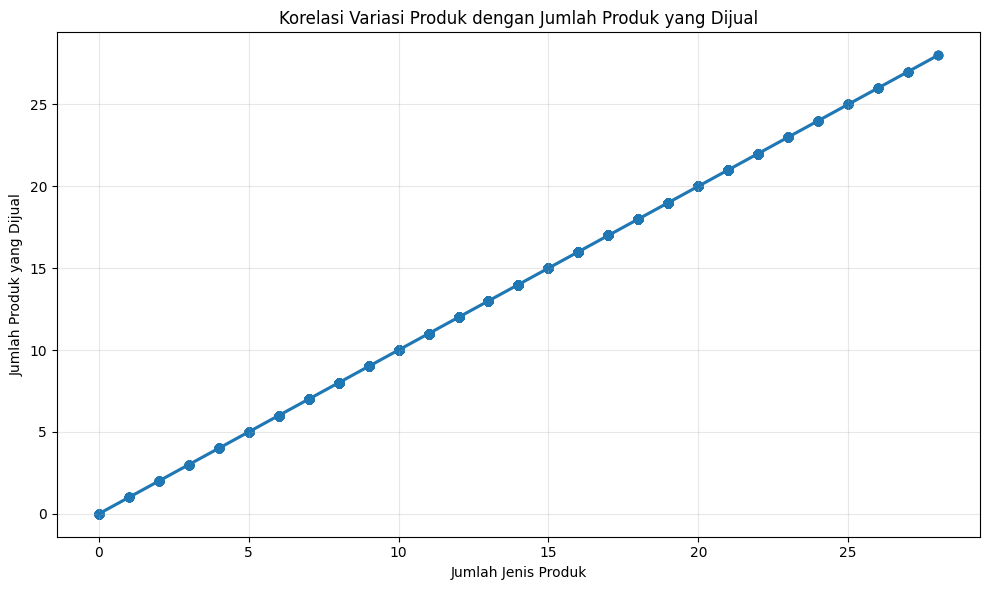

In [64]:
# Korelasi num_items_sold dengan product_variety
plt.figure(figsize=(10, 6))
sns.regplot(x='product_variety', y='num_items_sold', data=df, scatter_kws={'alpha':0.5})
plt.title('Korelasi Variasi Produk dengan Jumlah Produk yang Dijual')
plt.xlabel('Jumlah Jenis Produk')
plt.ylabel('Jumlah Produk yang Dijual')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Korelasi sempurna dan positif (linear sempurna):

Grafik membentuk garis lurus 45 derajat, artinya semakin banyak jenis produk yang dimiliki, semakin banyak juga produk yang dijual.

Tidak ada penyimpangan — setiap tambahan variasi produk secara langsung menaikkan jumlah produk terjual.

Hubungan satu banding satu:

Satu jenis produk tambahan menghasilkan kira-kira satu unit tambahan dalam jumlah penjualan.

Sangat mungkin ini adalah data sintetis atau hasil dari sistem simulasi.

Variasi produk adalah faktor penentu utama penjualan:

Di grafik ini, variasi produk sangat kuat pengaruhnya terhadap performa pasar.

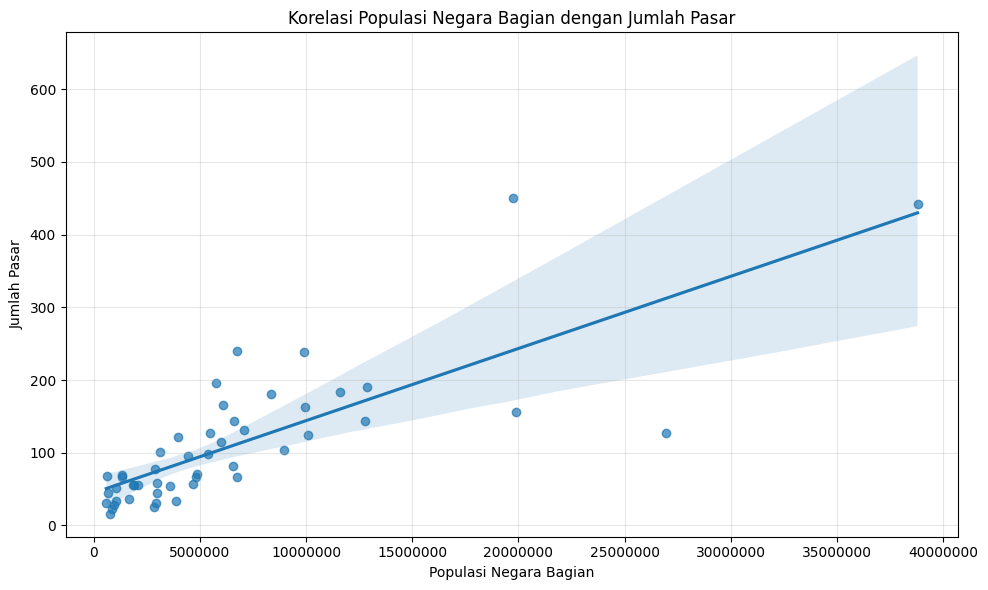

In [66]:
# Rata-rata produk per negara bagian
avg_products_by_state = df.groupby('state')['num_items_sold'].mean().reset_index()
avg_products_by_state.columns = ['state', 'avg_products']

# Rata-rata bulan buka per negara bagian
avg_months_by_state_df = df.groupby('state')['months_open'].mean().reset_index()
avg_months_by_state_df.columns = ['state', 'avg_months']

# Jumlah pasar per negara bagian
markets_by_state_df = df['state'].value_counts().reset_index()
markets_by_state_df.columns = ['state', 'market_count']

# Gabungkan dengan data populasi
state_data = df[['state', 'state_pop']].drop_duplicates().reset_index(drop=True)

# Gabungkan semua data untuk analisis
state_analysis = pd.merge(state_data, markets_by_state_df, on='state')
state_analysis = pd.merge(state_analysis, avg_products_by_state, on='state')
state_analysis = pd.merge(state_analysis, avg_months_by_state_df, on='state')

# Hitung pasar per juta penduduk
state_analysis['markets_per_million'] = state_analysis['market_count'] / (state_analysis['state_pop'] / 1000000)

# Hitung efisiensi (rata-rata produk per juta penduduk)
state_analysis['efficiency'] = state_analysis['avg_products'] * state_analysis['market_count'] / (state_analysis['state_pop'] / 1000000)

# Korelasi populasi dengan jumlah pasar
plt.figure(figsize=(10, 6))
sns.regplot(x='state_pop', y='market_count', data=state_analysis, scatter_kws={'alpha':0.7})
plt.title('Korelasi Populasi Negara Bagian dengan Jumlah Pasar')
plt.xlabel('Populasi Negara Bagian')
plt.ylabel('Jumlah Pasar')
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

Korelasi positif:

Umumnya, semakin besar populasi suatu negara bagian, semakin banyak jumlah pasarnya.

Ini tercermin dari arah naiknya garis regresi.

Variasi besar antar negara bagian:

Terdapat beberapa outlier: negara bagian dengan populasi besar tapi jumlah pasar relatif rendah (misalnya sekitar 26 juta populasi dengan hanya ~130 pasar).

Juga ada yang sebaliknya: populasi tidak terlalu besar, tapi punya jumlah pasar tinggi.

Hubungan tidak terlalu kuat (dispersi tinggi):

Banyak titik tersebar jauh dari garis tren, menunjukkan faktor selain populasi juga mempengaruhi jumlah pasar — seperti kebijakan lokal, tingkat urbanisasi, daya beli, infrastruktur, dll.

<Figure size 1200x600 with 0 Axes>

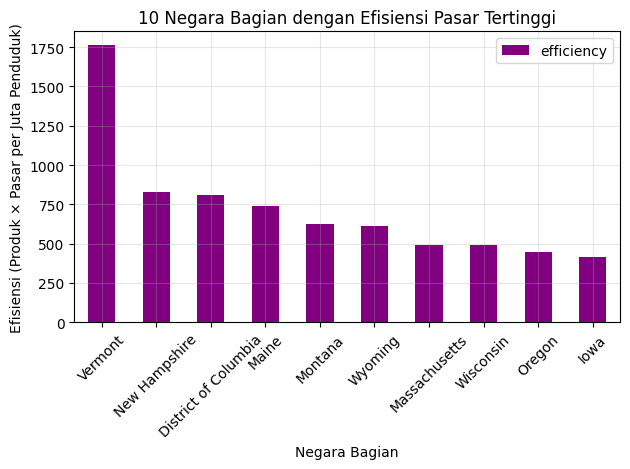

In [67]:
plt.figure(figsize=(12, 6))
state_analysis.sort_values('efficiency', ascending=False).head(10)[['state', 'efficiency']].set_index('state').plot(kind='bar', color='purple')
plt.title('10 Negara Bagian dengan Efisiensi Pasar Tertinggi')
plt.xlabel('Negara Bagian')
plt.ylabel('Efisiensi (Produk × Pasar per Juta Penduduk)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Vermont mendominasi:

Efisiensi pasarnya sangat tinggi, jauh melampaui negara bagian lainnya.

Menunjukkan bahwa meskipun penduduknya sedikit, Vermont punya banyak pasar yang menjual banyak produk.

Negara bagian kecil cenderung efisien:

New Hampshire, District of Columbia, dan Maine juga memiliki skor tinggi, menunjukkan bahwa negara bagian dengan populasi kecil bisa sangat optimal dalam penetrasi pasar.

Efisiensi bukan soal jumlah total, tapi keseimbangan:

Negara bagian besar (seperti California, Texas) tidak masuk daftar ini, karena meskipun pasar dan produk banyak, efisiensinya rendah relatif terhadap populasinya.

Negara dengan rasio produk dan pasar yang tinggi dibandingkan populasinya akan mendapat skor efisiensi lebih baik.

<Figure size 1200x600 with 0 Axes>

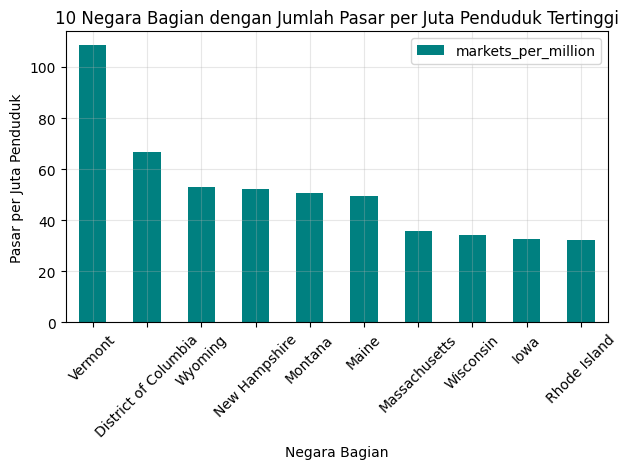

In [68]:
# Top 10 pasar per juta penduduk
plt.figure(figsize=(12, 6))
state_analysis.sort_values('markets_per_million', ascending=False).head(10)[['state', 'markets_per_million']].set_index('state').plot(kind='bar', color='teal')
plt.title('10 Negara Bagian dengan Jumlah Pasar per Juta Penduduk Tertinggi')
plt.xlabel('Negara Bagian')
plt.ylabel('Pasar per Juta Penduduk')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Vermont luar biasa menonjol:

Dengan lebih dari 100 pasar per juta penduduk, Vermont secara signifikan lebih unggul dibanding negara bagian lain.

Artinya, akses pasar per penduduk sangat tinggi, menjadikannya tempat ideal untuk distribusi dan penetrasi produk.

Wilayah kecil mendominasi daftar:

Negara bagian dengan populasi lebih kecil seperti District of Columbia, Wyoming, New Hampshire, dan Montana menempati posisi tinggi.

Ini bisa disebabkan oleh ukuran geografis yang kecil dan pola distribusi lokal yang merata.

Negara bagian besar tidak muncul di sini:

Negara seperti Texas, California, Florida tidak masuk daftar karena meskipun jumlah pasar mereka mungkin tinggi secara absolut, rasio terhadap populasinya kecil.

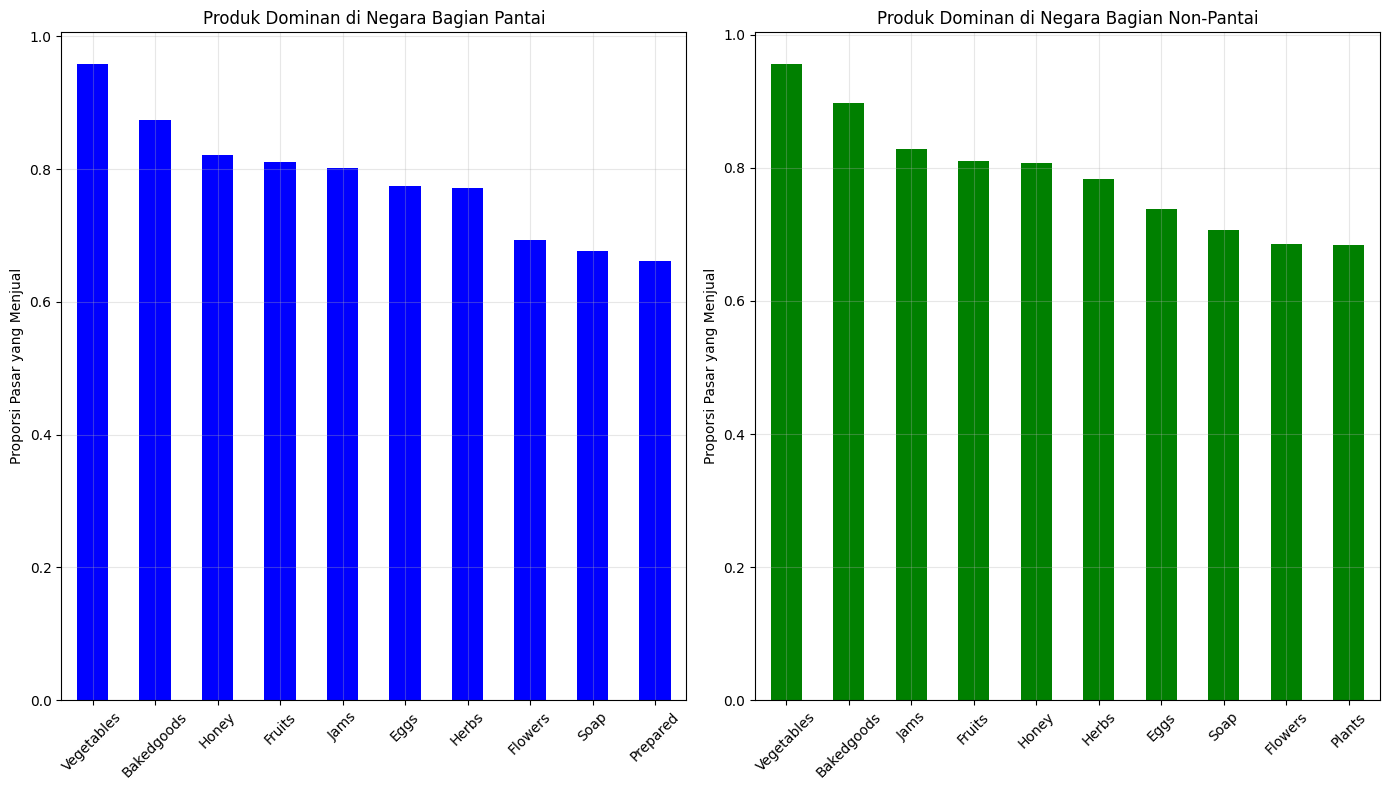

In [69]:
# Definisikan negara bagian pantai
coastal_states = ['California', 'Oregon', 'Washington', 'Texas', 'Louisiana', 
                 'Mississippi', 'Alabama', 'Florida', 'Georgia', 'South Carolina', 
                 'North Carolina', 'Virginia', 'Maryland', 'Delaware', 'New Jersey', 
                 'New York', 'Connecticut', 'Rhode Island', 'Massachusetts', 
                 'New Hampshire', 'Maine', 'Hawaii', 'Alaska']

# Tandai pasar yang berada di negara bagian pantai
df['is_coastal'] = df['state'].apply(lambda x: 1 if x in coastal_states else 0)

# Bandingkan produk dominan: pantai vs non-pantai
coastal_products = df[df['is_coastal'] == 1][product_columns].mean().sort_values(ascending=False)
noncoastal_products = df[df['is_coastal'] == 0][product_columns].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
# Plot produk dominan di pantai
plt.subplot(1, 2, 1)
coastal_products.head(10).plot(kind='bar', color='blue')
plt.title('Produk Dominan di Negara Bagian Pantai')
plt.ylabel('Proporsi Pasar yang Menjual')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot produk dominan di non-pantai
plt.subplot(1, 2, 2)
noncoastal_products.head(10).plot(kind='bar', color='green')
plt.title('Produk Dominan di Negara Bagian Non-Pantai')
plt.ylabel('Proporsi Pasar yang Menjual')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



📌 Grafik Kiri: Negara Bagian Pantai
Produk dengan proporsi tertinggi dijual oleh pasar:

Sayuran (Vegetables) → ~96%

Kue Panggang (Bakedgoods) → ~89%

Madu (Honey), Buah (Fruits), dan Selai (Jams) → >80%

Produk dengan proporsi lebih rendah:

Prepared foods, Sabun (Soap), dan Bunga (Flowers) → ~67–70%

➡️ Ciri khas pasar pantai: Fokus pada produk segar (sayuran, buah) dan makanan jadi, dengan variasi kecil di kerajinan dan bunga.

📌 Grafik Kanan: Negara Bagian Non-Pantai
Pola hampir identik:

Sayuran tetap mendominasi (~96%)

Kue, Selai, Buah, dan Madu juga mendekati proporsi tinggi

Produk unik: Tanaman (Plants) muncul di 10 besar (tidak ada di grafik pantai)

➡️ Ciri khas pasar non-pantai: Masih menekankan hasil tani segar, namun lebih bervariasi dengan produk seperti tanaman dan sabun.

<Figure size 1000x600 with 0 Axes>

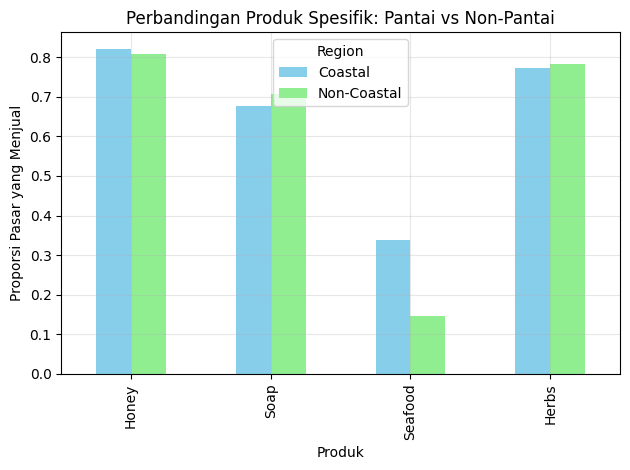

In [70]:
# Fokus pada produk spesifik yang disebutkan
focus_products = ['Honey', 'Soap', 'Seafood', 'Herbs']

# Buat dataframe untuk perbandingan regional
regional_comparison = pd.DataFrame({
    'Coastal': df[df['is_coastal'] == 1][focus_products].mean(),
    'Non-Coastal': df[df['is_coastal'] == 0][focus_products].mean()
})

# Plot perbandingan produk spesifik
plt.figure(figsize=(10, 6))
regional_comparison.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Perbandingan Produk Spesifik: Pantai vs Non-Pantai')
plt.ylabel('Proporsi Pasar yang Menjual')
plt.xlabel('Produk')
plt.grid(True, alpha=0.3)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

Honey (Madu) dijual oleh proporsi pasar yang sangat tinggi di kedua wilayah, dengan sedikit lebih banyak di wilayah pantai.

Soap (Sabun) juga populer di kedua wilayah, dengan proporsi yang hampir sama antara pantai dan non-pantai.

Seafood memiliki perbedaan paling mencolok:

Jauh lebih banyak dijual di wilayah pantai dibandingkan non-pantai.

Ini wajar karena kedekatannya dengan sumber laut.

Herbs (Rempah-rempah) memiliki proporsi tinggi dan hampir setara di kedua wilayah.